## Use data from 2001-2017 to predict the data from 2017 - 2020

In [35]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import copy

In [36]:
data = pd.concat([pd.read_csv('nba_stats.csv'), pd.read_csv('playoffs.csv')], 
                 ignore_index = True)
data.DATE = pd.to_datetime(data['DATE'])

date_cut = '2017-12-31'
data_test = copy.deepcopy(data[data['DATE']>=date_cut])
data_train = copy.deepcopy(data[data['DATE']<date_cut])

In [37]:
drop_list = ['TEAM', 'DATE', 'MATCHUP', 'PTS', '+/-']


data_test['W/L'] = [1 if i == 'W' else 0 for i in data_test['W/L']]
data_train['W/L'] = [1 if i == 'W' else 0 for i in data_train['W/L']]
data_test = data_test.drop(drop_list, axis=1)
data_train = data_train.drop(drop_list, axis=1)
print("Test set shape: {}\t Training set shape: {}".format(data_test.shape, data_train.shape))

Test set shape: (6363, 19)	 Training set shape: (43150, 19)


## Random Forest

In [27]:
def vis_importance(clf):
    # plot the feature importances
    fig = plt.figure(figsize=[10, 5])
    value = clf.feature_importances_
    keys = list(train_set.keys())
    x = [i for i in range(len(keys))]
    plt.bar(x, value, color='r')
    plt.title('Importance of each attribute')
    plt.xticks(np.arange(len(x)), keys)
    plt.xlabel('Statistic tags')
    plt.ylabel('Importance')
    plt.grid(ls='--')
    plt.show()
    

[1 0 0 ... 1 1 1]
0.7702341662737703


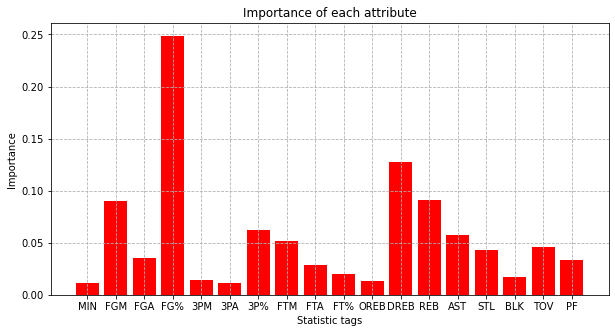

In [28]:
from sklearn.ensemble import RandomForestClassifier
# first divide raw data into statistics and labels
train_set = data_train.drop('W/L', axis=1)
train_label = data_train['W/L']
test_set = data_test.drop('W/L', axis=1)
test_label = data_test['W/L']

clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(train_set, train_label)
print(clf.predict(test_set));
print(clf.score(test_set, test_label))

vis_importance(clf)


## KNN Classifier

In [29]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(train_set, train_label)
print(neigh.predict(test_set))
print(neigh.score(test_set, test_label))

[1 0 0 ... 1 1 1]
0.7369165487977369


## Random Forest

[0 0 0 ... 1 1 1]
0.710985384252711


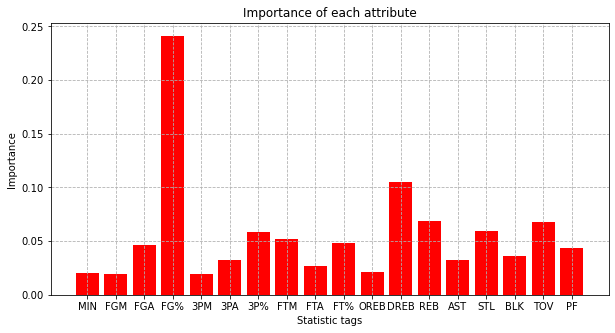

In [30]:
from sklearn.tree import DecisionTreeClassifier
decision_clf = DecisionTreeClassifier(random_state=0)
decision_clf.fit(train_set, train_label)
print(decision_clf.predict(test_set))
print(decision_clf.score(test_set, test_label))

vis_importance(decision_clf)

## Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
logic_cls = LogisticRegression(random_state=0).fit(train_set, train_label)
print(logic_cls.predict(test_set))
print(logic_cls.score(test_set, test_label))

[1 0 0 ... 1 1 0]
0.8327832783278328


/home/haoyuan/enter/envs/unisal/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## SVM

In [16]:
from sklearn.svm import SVC
svm_cls = SVC(gamma='auto').fit(train_set, train_label)
print(svm_cls.predict(test_set))
print(svm_cls.score(test_set, test_label))

[1 1 1 ... 1 1 0]
0.7069109075770191


## MLP
Here we try multi-layer preceptron implemented by pytorch, we leverage Adam optimizer and CrossEntropy loss to deal with dataset of batch 256. However, such neural network method seems not better than logistic regression.

In [80]:
# one_hot encoding the TEAM and matchup.
from sklearn.preprocessing import OneHotEncoder
data = pd.concat([pd.read_csv('nba_stats.csv'), pd.read_csv('playoffs.csv')], 
                 ignore_index = True)
data.DATE = pd.to_datetime(data['DATE'])

# preprocess data, for classification purpose, assign win to 1 and lose to 0
data['W/L'] = [1 if i == 'W' else 0 for i in data['W/L']]
data['MATCHUP'] = data['MATCHUP'].astype('str')
data['HOME/AWAY'] = ['H' if s[4]=='v' else 'A' for s in data['MATCHUP']]

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(data[['TEAM','HOME/AWAY']])
column_names = enc.get_feature_names(['TEAM','HOME/AWAY'])
tmp_data = enc.transform(data[['TEAM','HOME/AWAY']]).toarray()
tmp_features = pd.DataFrame(tmp_data, columns=column_names,dtype = int)
data = pd.concat([data, tmp_features], axis=1).drop(columns=['TEAM','MATCHUP','HOME/AWAY','+/-'])

date_cut2 = '2017-12-31'
date_cut1 = '2010-12-31'
data_test = copy.deepcopy(data[data['DATE']>=date_cut2])
data_train = copy.deepcopy(data[data['DATE']<date_cut2][data['DATE']>date_cut1])

data_test = data_test.drop(columns=['DATE'])
data_train = data_train.drop(columns=['DATE'])

/home/haoyuan/enter/envs/unisal/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [81]:
data_test

,W/L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,...,TEAM_POR,TEAM_SAC,TEAM_SAS,TEAM_SEA,TEAM_TOR,TEAM_UTA,TEAM_VAN,TEAM_WAS,HOME/AWAY_A,HOME/AWAY_H
0,1,240,96,34,88,38.6,10,26,38.5,18,...,0,0,0,0,0,0,0,1,1,0
1,0,239,113,39,95,41.1,12,35,34.3,23,...,0,0,0,0,0,0,0,1,0,1
2,0,240,103,38,92,41.3,9,36,25.0,18,...,0,0,0,0,0,0,0,1,1,0
3,0,240,107,38,90,42.2,10,27,37.0,21,...,0,0,0,0,0,0,0,1,1,0
4,0,240,98,36,85,42.4,7,21,33.3,19,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48430,0,238,103,35,77,45.5,12,26,46.2,21,...,0,0,0,0,0,0,0,0,1,0
48431,1,241,130,45,95,47.4,18,28,64.3,22,...,0,0,0,0,0,0,0,0,0,1
48432,1,239,113,44,81,54.3,10,22,45.5,15,...,0,0,0,0,0,0,0,0,0,1
48433,1,240,114,41,77,53.2,16,30,53.3,16,...,0,0,0,0,1,0,0,0,0,1


In [82]:
# first divide raw data into statistics and labels
train_set = data_train.drop('W/L', axis=1)
train_label = data_train['W/L']
test_set = data_test.drop('W/L', axis=1)
test_label = data_test['W/L']

In [85]:
import torch
import torch.utils.data as data
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self, n_feat, n_classes):
        print(f"n_feat={n_feat}")
        super(MLP, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(n_feat, 10),
            nn.ReLU(),
         )
        self.layer2 = nn.Sequential(
            nn.Linear(10, 10),
            nn.ReLU(),
        )
        self.classifier = nn.Linear(10, n_classes)
    
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        output = self.classifier(x)
        return output

    
class nba_data(torch.utils.data.Dataset):
    def __init__(self, raw_data):
        self.samples, self.labels = raw_data
    
    def __getitem__(self, index):
        samples = self.samples[index]
        labels = self.labels[index]
        
        return samples, labels
    
    def __len__(self):
        return self.samples.shape[0]

train_set = np.array(train_set, dtype=np.float32)
train_label = np.array(train_label)
test_set = np.array(test_set, dtype=np.float32)
test_label = np.array(test_label)
trainset = nba_data((train_set, train_label))
train_loader = torch.utils.data.DataLoader(trainset, batch_size=256, num_workers=4, shuffle=True)
testset = nba_data((test_set, test_label))
test_loader = torch.utils.data.DataLoader(testset, batch_size=256, num_workers=4, shuffle=False)

mlp = MLP(n_feat=train_set.shape[1], n_classes=2)
optim = torch.optim.Adam(mlp.parameters(), lr = 1e-3, weight_decay = 0.00005)
criterion = torch.nn.CrossEntropyLoss()

# training epochs
# set netowrk in training mode
mlp.train()
for epoch in range(50):
    losses = []
    correct = 0.0
    for i, (datas,labels) in enumerate(train_loader):

        optim.zero_grad()
        
        datas = torch.FloatTensor(datas)
        labels = torch.LongTensor(labels)
        output = mlp(datas)
        
        _, pred = output.max(1)
        correct += (pred==labels).sum()
        loss = criterion(output, labels)
        losses.append(loss.item())
        loss.backward()
        optim.step()
        
    avg_loss = sum(losses) / len(losses)
    train_acc = float(correct) / train_set.shape[0]
    print("Epoch{}\tLoss:{:.4f}\tAcc:{:.4f}%".format(epoch, avg_loss, train_acc*100))


test_loss = []
correct = 0.0
mlp.eval()
for i, (datas,labels) in enumerate(test_loader):
        
        datas = torch.FloatTensor(datas)
        labels = torch.LongTensor(labels)
        output = mlp(datas)
        
        loss = criterion(output, labels)
        test_loss.append(loss.item())
        
        _, pred = output.max(1)
        correct += (pred == labels).sum() 
        
avg_loss = sum(test_loss) / len(test_loss)
avg_acc = float(correct) / test_set.shape[0]
print("TestAcc:{:.4f}%\tTestLoss:{:.4f}\t".format(avg_acc*100, avg_loss))

n_feat=57
Epoch0	Loss:0.6372	Acc:67.9502%
Epoch1	Loss:0.5024	Acc:77.0348%
Epoch2	Loss:0.4408	Acc:79.6403%
Epoch3	Loss:0.4278	Acc:79.9919%
Epoch4	Loss:0.4025	Acc:81.6405%
Epoch5	Loss:0.3969	Acc:81.7270%
Epoch6	Loss:0.3890	Acc:82.3726%
Epoch7	Loss:0.3815	Acc:82.7646%
Epoch8	Loss:0.3744	Acc:83.2257%
Epoch9	Loss:0.3690	Acc:83.3180%
Epoch10	Loss:0.3725	Acc:83.2603%
Epoch11	Loss:0.3663	Acc:83.6004%
Epoch12	Loss:0.3603	Acc:83.7215%
Epoch13	Loss:0.3580	Acc:84.1134%
Epoch14	Loss:0.3563	Acc:83.9463%
Epoch15	Loss:0.3535	Acc:84.1365%
Epoch16	Loss:0.3532	Acc:84.2979%
Epoch17	Loss:0.3506	Acc:84.2921%
Epoch18	Loss:0.3485	Acc:84.4305%
Epoch19	Loss:0.3554	Acc:84.0212%
Epoch20	Loss:0.3489	Acc:84.3383%
Epoch21	Loss:0.3530	Acc:84.2518%
Epoch22	Loss:0.3478	Acc:84.5112%
Epoch23	Loss:0.3431	Acc:84.6956%
Epoch24	Loss:0.3437	Acc:84.4362%
Epoch25	Loss:0.3488	Acc:84.4017%
Epoch26	Loss:0.3474	Acc:84.3728%
Epoch27	Loss:0.3448	Acc:84.5400%
Epoch28	Loss:0.3493	Acc:84.4766%
Epoch29	Loss:0.3417	Acc:84.5688%
Epoch30	Lo

## The test accuracy of the MLP is 84.65%

## Summary
- Accuracy for different models: 
Random forest: 77.02%  
KNN: 73.69%  
Decision Tree: 71.10%  
Logistic Regression: 83.28%  
SVM: 70.69%  
MLP: 84.65%  